In [2]:
# import important stuff
import numpy as np
import pandas as pd

In [3]:
# import visulization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [4]:
# import sklearn modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [5]:
# import word cloud module 
from os import path
from wordcloud import WordCloud

# import datetime
from datetime import datetime

In [6]:
# import the data from csv file with a series of NAN values 
df= pd.read_csv('./../Consumer_Complaints_sample.csv',parse_dates=['Date received', 'Date sent to company'])

In [7]:
# Overlook of the data set
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104588 entries, 0 to 104587
Data columns (total 19 columns):
Unnamed: 0                      104588 non-null int64
Date received                   104588 non-null datetime64[ns]
Product                         104588 non-null object
Sub-product                     81021 non-null object
Issue                           104588 non-null object
Sub-issue                       54877 non-null object
Consumer complaint narrative    28579 non-null object
Company public response         32819 non-null object
Company                         104588 non-null object
State                           103344 non-null object
ZIP code                        102887 non-null object
Tags                            14505 non-null object
Consumer consent provided?      50815 non-null object
Submitted via                   104588 non-null object
Date sent to company            104588 non-null datetime64[ns]
Company response to consumer    104588 non-null object


In [8]:
df['Date received'][0]

Timestamp('2015-03-20 00:00:00')

In [9]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [10]:
df['receive month'] = df['Date received'].apply(lambda x: month_order[x.month-1])

month_df = pd.DataFrame(df['receive month'].value_counts()).reset_index()
month_df.columns = ['Month', 'Complaints']

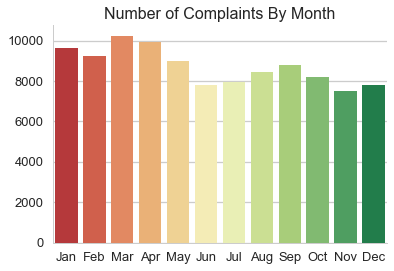

In [11]:
sns.barplot(x='Month', y='Complaints', data=month_df, order=month_order, palette="RdYlGn")
plt.title('Number of Complaints By Month',fontsize=16)
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.savefig('./../results/monthly_complaints.png', bbox_inches='tight', dpi = 150)
sns.set_style('whitegrid')

Consumer disputed? receive month        No       Yes
0                            Apr  0.826904  0.173096
1                            Aug  0.809334  0.190666
2                            Dec  0.808694  0.191306
3                            Feb  0.813157  0.186843
4                            Jan  0.816369  0.183631
5                            Jul  0.801177  0.198823
6                            Jun  0.778944  0.221056
7                            Mar  0.816709  0.183291
8                            May  0.794624  0.205376
9                            Nov  0.820352  0.179648
10                           Oct  0.804426  0.195574
11                           Sep  0.805519  0.194481


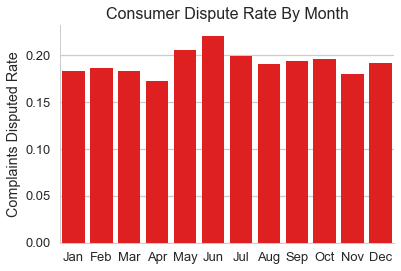

In [12]:
df_dispute_avail = df.dropna(axis=0, subset=['Consumer disputed?'])
df_dispute_month = df_dispute_avail.groupby('receive month')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
print(df_dispute_month)
sns.barplot(x='receive month', y='Yes', data = df_dispute_month, order=month_order, color='red')
plt.ylabel('Complaint disputed')
plt.title('Consumer Dispute Rate By Month',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('')
plt.ylabel('Complaints Disputed Rate')
plt.savefig('./../results/month_dispute.png', bbox_inches='tight', dpi = 150)

In [13]:
# consumer complaints by day of the week 

In [14]:

df['receive weekday'] = df['Date received'].apply(lambda x: day_order[x.weekday()])


weekday_df = pd.DataFrame(df['receive weekday'].value_counts()).reset_index()
weekday_df.columns = ['WeekDate', 'Complaints']

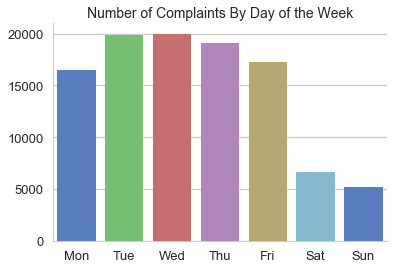

In [15]:
sns.barplot(x='WeekDate', y='Complaints', data=weekday_df, order=day_order, palette='muted')
plt.title('Number of Complaints By Day of the Week',fontsize=14)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.savefig('./../results/weekly_complaints.png', bbox_inches='tight', dpi = 150)


In [16]:
df_dispute_weekday = df_dispute_avail.groupby('receive weekday')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
print(df_dispute_weekday)
sns.barplot(x='receive weekday', y='Yes', data = df_dispute_weekday, order=day_order, palette="deep")
plt.ylabel('Complaint disputed')
plt.title('Consumer Dispute Rate By Weekday',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Weekday')
plt.ylabel('Complaints Disputed Rate')
plt.savefig('./../results/weekday_dispute.png', bbox_inches='tight', dpi = 150)


KeyError: 'receive weekday'

In [ ]:
# consumer complaints of only mortgage products by day of the week 

In [ ]:

weekday_mortgage_df = pd.DataFrame(df[df['Product_new']=='Mortgage']['receive weekday'].value_counts()).reset_index()
weekday_mortgage_df.columns = ['WeekDate', 'Complaints']
sns.barplot(x='WeekDate', y='Complaints', data=weekday_mortgage_df, order=day_order, color='red')

In [ ]:
df['Year'] = df['Date received'].apply(lambda x: x.year)

In [ ]:
df_year = pd.DataFrame(df['Year'].value_counts().reset_index())
df_year.columns=['Year', 'Complaints']
plt.figure(figsize=(16,6))
sns.pointplot(x='Year', y='Complaints', data=df_year)
plt.ylabel('Number of Complaints')

In [ ]:
#how many complaints for each financial product?
df_product = pd.DataFrame(df['Product'].value_counts()).reset_index()
df_product.columns = ['Product','Complaints Count']
df_product

In [ ]:
# The product list above seem overlapping with each other. Check the appearance year of the complaints for each product. 
df.groupby('Product')['Year'].value_counts(normalize=True).unstack()

### Many of the product in the list were changed over the years. For example, credit card, prepaid card were in earlier years but stopped (NaN) after 2017. Instead Credit card or prepaid card feature only appears in later years. Next, I combine some of the products to simplify the product feature. This also makes it more consistent over the years. 

In [ ]:
#Many products seem to be replications. Define a function here to fix that.
def categorize_feature(ls):
    new_ls = []
    for i, prod in enumerate(ls):
        if prod in ['Credit reporting', 'Credit reporting, credit repair services, or other personal consumer reports']:
            new_ls.append('Credit reporting, or other consumer reports')
        elif prod in ['Credit card', 'Prepaid card', 'Credit card or prepaid card']:
            new_ls.append('Credit card or prepaid card')
        elif prod in ['Student loan', 'Consumer Loan', 'Vehicle loan or lease', 'Payday loan', 'Payday loan, title loan, or personal loan']:
            new_ls.append('Personal loans')
        elif prod in ['Money transfer, virtual currency, or money service', 'Money transfers', 'Virtual currency']:
            new_ls.append('Money transfer, virtual currency, or money service')
        elif prod in ['Checking or savings account', 'Bank account or service']:
            new_ls.append('Bank account or service')
        else:
            new_ls.append(prod)
    return new_ls

new_list = categorize_feature(df['Product'])

In [ ]:
df['Product_new'] = pd.Series(new_list)

In [ ]:
# Value counts of the simplified product list 
product_order = pd.Series(new_list).value_counts().index
print('How many complaints per product:')
print(pd.Series(new_list).value_counts())

sns.countplot(data=df, x='Product_new', order = product_order, palette='muted')
plt.xticks(rotation=40, ha="right")
plt.title('Consumer Complaints By Product',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('')
plt.ylabel('Number of Consumer Complaints')
plt.savefig('./../results/product_complaints.png', bbox_inches='tight', dpi = 150)

In [ ]:
# Percentage of complaints being disputed for the simplified products

df_dispute = df.dropna(axis=0, subset=['Consumer disputed?'])
df_dispute_product = df_dispute.groupby('Product_new')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()

sns.barplot(data=df_dispute_product, y='Product_new', x='Yes',order = product_order, color='red')

#sns.barplot(data=df_dispute, x='Product_new', hue='Consumer disputed?',order = pd.Series(new_list).value_counts().index)

plt.title('Consumer Dispute Rate By Product',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('Product')
plt.savefig('./../results/dispute_product.png', bbox_inches='tight', dpi = 150)

In [ ]:
# check the sub-product feature:
df[df['Product_new']=='Mortgage']['Sub-product'].value_counts()

In [ ]:
# check the value counts of the 'Issue' feature
df['Issue'].value_counts()
df['Issue'].nunique()

In [ ]:
# Word cloud from issue

all_tags = []
for iter_row, row in df.iterrows():
    my_tags = row['Issue'].split(',')
    for tag in my_tags:
        all_tags.append(tag)


#Read the whole text.
text = ' '.join(all_tags)

text
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./../results/issue_wordcloud.png',bbox_inches='tight', dpi = 150)
plt.show()

In [ ]:
top_issue = list(pd.DataFrame(df['Issue'].value_counts()[0:30]).index)

df_top_issue = df[df['Issue'].isin(top_issue)]

In [ ]:
df_top_issue['Issue'].value_counts().head(5)

In [ ]:
top_company = list(pd.DataFrame(df_top_issue.Company.value_counts()[0:30]).index)
df_top_issue_comp = df_top_issue[df_top_issue['Company'].isin(top_company)]

In [ ]:
df_top_issue_comp['Company'].value_counts().head(5)

In [ ]:
# choose categoric columns that we are using for initial test
categoric = df_top_issue_comp[['Product','Issue', 'Company', 'Consumer consent provided?', 'Submitted via', 'Timely response?', 'Company response to consumer']]
target_d = df_top_issue_comp['Consumer disputed?']

In [ ]:
df_dummy_cate = pd.get_dummies(data=categoric, drop_first=True)
target_dummy = pd.get_dummies(data=target_d, drop_first=True)
df_dummy = df_dummy_cate.join(target_dummy)

In [ ]:
#df_dummy.corr()['Yes']

In [ ]:

#check how many complaints were disputed for each company response. 
print(df_top_issue_comp.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index())
df_response = df_top_issue_comp.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
df_response.dropna(subset=['Yes'], inplace=True)
sns.barplot(y='Company response to consumer', x='Yes', data = df_response, color='red')
plt.xlabel('Complaint disputed')
plt.title('Consumer Dispute Rate By Company Response',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('Company Response')
plt.savefig('./../results/company_response_dispute.png', bbox_inches='tight', dpi = 150)

In [ ]:
# find the values counts of the public response from companies
df_company_response = df.dropna(axis=0, subset=['Company public response'])
print(df_company_response['Company public response'].value_counts())
df_company_response_order = df_company_response['Company public response'].value_counts().index[0:-1]

In [ ]:
# disputed rate for public company responses
df_company_response_dispute = df_company_response.dropna(axis=0, subset=['Consumer disputed?'])
df_company_response_dispute_rate=df_company_response_dispute.groupby('Company public response')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
# set value to 0 instead of NaN for one input.
df_company_response_dispute_rate.at[2, 'Yes'] =0
sns.barplot(y='Company public response', x='Yes', data = df_company_response_dispute_rate.sort_values('Yes'), palette='Greens')
plt.title('Consumer Dispute Rate By Company Public Response',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('')
plt.savefig('./../results/public_company_response_dispute.png', bbox_inches='tight', dpi = 150)

In [ ]:
df['narative_bool'] = pd.isnull(df['Consumer complaint narrative'])

In [ ]:
df['narative_int'] = df['narative_bool'].astype(int)

In [ ]:
# did narrative or not have an effect on dispute?
df.groupby('Consumer disputed?')['narative_bool'].value_counts(normalize=True).unstack()

In [ ]:
# any product particularly easy to be disputed?
df_product = df.groupby('Product')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()[:-1]
sns.barplot(y='Product', x='Yes', data = df_product.sort_values('Yes'), palette='Blues')
plt.xlabel('Complaint disputed')

In [ ]:
#most appeared companies VS disputed?

df_comp = df_top_issue_comp.groupby('Company')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
plt.figure(figsize=(12,12))
sns.barplot(y='Company', x='Yes', data = df_comp.sort_values('Yes'))
plt.title('Consumer Dispute Rate By Company (top30)',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('')
plt.savefig('./../results/company_dispute.png', bbox_inches='tight', dpi = 150)


In [ ]:
#check how many complaints were disputed. 
sns.countplot(df['Consumer disputed?'], palette=['red','green'])
plt.title('Consumer Dispute Counts',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.ylabel('Count of Complaints')
plt.savefig('./../results/complaint_dispute.png', bbox_inches='tight', dpi = 150)

In [ ]:
# drop the rows where 'consumer disputed?' is missing
df.dropna(axis=0, subset=['Consumer disputed?'], inplace=True)

In [ ]:

df_nara_bool = df_top_issue_comp['Consumer complaint narrative'].fillna(0)

df_nara_bool2=[]
for nara in df_nara_bool:
    if nara is not 0:
        df_nara_bool2.append(1)
    else: 
        df_nara_bool2.append(0)
        
df_top_issue_comp['Narrative_bool'] = df_nara_bool2

In [ ]:
df_top_issue_comp_short = df_top_issue_comp.drop(['Unnamed: 0', 'Sub-issue', 'Company public response', 'Consumer consent provided?', 'State', 'ZIP code', 'Date sent to company', 'Date received', 'Consumer complaint narrative','Complaint ID', 'Tags'],axis=1)

In [ ]:
df_top_issue_comp_short.info()

In [ ]:
df_dummies = pd.get_dummies(data=df_top_issue_comp_short.drop(['Consumer disputed?','Narrative_bool'], axis=1), drop_first=True)

In [ ]:
df_dummies.info()

In [ ]:
# Identify variables
X = df_dummies.join(df_top_issue_comp_short['Narrative_bool'])
target_map = {'Yes': 1, 'No':0}
y = df_top_issue_comp['Consumer disputed?'].map(target_map)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=41)


rus = RandomUnderSampler(random_state=41)
X_rus, y_rus = rus.fit_sample(X=X_train, y=y_train)
X_rus_test, y_rus_test = rus.fit_sample(X=X_test, y=y_test)

print('Raw Training Set Percent Yes: {:.1f}%'.format(
    len(y_train[y_train == 1])/len(y_train)*100))
print('Resampled Training Set Percent Yes: {}%'.format(
    len(y_rus[y_rus == 1])/len(y_rus)*100))

In [ ]:
#Random forest classifier parameter optimization:

rf = RandomForestClassifier()
param_grid = {"n_estimators": [100, 200, 300],
              "max_features": [75, 100],
              "max_depth": [3, 5, 10]
              }

grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_rus, y_rus)

# Printing the best score from the model
print('Best Score:', grid_rf.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_rf.best_params_
print('Best Parameters:', best_params)

In [ ]:
#initiate a instance for classifier
rf = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
rf.fit(X_rus, y_rus)

# Predict the labels of the test data: y_pred
y_pred = rf.predict(X_rus_test)

scores_rf_train = cross_val_score(rf, X_rus, y_rus, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_rf_train.mean(), 
                                                                                 scores_rf_train.std()*2))
scores_rf_test = cross_val_score(rf, X_rus_test, y_rus_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_rf_test.mean(), 
                                                                                 scores_rf_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(y_rus_test, y_pred))
print('Classification report on the test data:')
print(classification_report(y_rus_test, y_pred))

In [ ]:
len(X)

In [ ]:
df_narative = df.dropna(axis=0, subset=['Consumer complaint narrative'])
df_narative['NarativeLength'] = [len(nara) for nara in df_narative['Consumer complaint narrative']]
# length of the narrative VS consumer disputed?
plt.figure(figsize=(8,6))
sns.boxplot(data=df_narative, y='NarativeLength', x='Consumer disputed?', order=['Yes', 'No'],palette=['red', 'green'])

plt.title('Consumer Dispute VS Narrative Length',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.ylabel('Consumer Narrative Length')
plt.xlabel('Consumer disputed?')
plt.savefig('./../results/narrativelength_dispute.png', bbox_inches='tight', dpi = 150)


In [ ]:
df_narrative_bool = df.groupby('Narrative_bool')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
df_narrative_bool
sns.barplot(x='Narrative_bool', y='Yes', data = df_narrative_bool.sort_values('Yes'))
plt.ylabel('Complaint disputed')
plt.xlabel('Whether Consumer Authorize Narrative')

In [ ]:
#nltk.download_shell()

In [ ]:
import string
from nltk.corpus import stopwords


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
df_narative['Consumer disputed?'].value_counts()

In [ ]:
df_narative['Consumer complaint narrative'].head(1).apply(text_process)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_narative['Consumer complaint narrative'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

In [ ]:
narrative0 = df_narative['Consumer complaint narrative'].head(1)
print(narrative0)
bow0 = bow_transformer.transform([narrative0])

In [ ]:
narrative_bow = bow_transformer.transform(df_narative['Consumer complaint narrative'])

In [ ]:
print('Shape of Sparse Matrix: ', narrative_bow.shape)
print('Amount of Non-Zero occurences: ', narrative_bow.nnz)

In [ ]:
#transform text to TFIDF format

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(narrative_bow)

tfidf0 = tfidf_transformer.transform(bow0)

narrative_tfidf = tfidf_transformer.transform(narrative_bow)
print(narrative_tfidf.shape)

In [ ]:
#nbm = MultinomialNB().fit(narrative_tfidf, df_narative['Consumer disputed?'])
#print('predicted:', nbm.predict(tfidf0)[0])
#print('expected:',df_narative['Consumer disputed?'].head(1))

In [ ]:
#print('predicted:', nbm.predict(tfidf0)[0])
#print('expected:',df_narative['Consumer disputed?'].head(1))

In [ ]:
#random under sampling data and train-test split
from sklearn.model_selection import train_test_split

rus = RandomUnderSampler(random_state=41)
X, y = rus.fit_sample(narrative_tfidf, df_narative['Consumer disputed?'])

msg_train, msg_test, label_train, label_test = train_test_split(X, y , test_size=0.2)

#print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
scores_rf_test = cross_val_score(pipeline, X_rus_test, y_rus_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_rf_test.mean(), 
                                                                                 scores_rf_test.std()*2))

from sklearn.metrics import classification_report
print('Confusion matrix on the data:')
print(confusion_matrix(label_test, predictions))
print('Classification on the data:')
print (classification_report(label_test, predictions))
